In [19]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

# Load datasets

## Vaccination data

In [20]:
# https://github.com/owid/covid-19-data/tree/master/public/data
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
df = pd.read_csv(url)

## List of used country data
Please add countries here if you want to see more of them

In [32]:
country_list = ['Germany', 'Norway', 'Sweden', 'Denmark', 'France', 'Spain', 'Italia', 'Netherlands']

## 14-day cases

In [22]:
url = "https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv"
df_inf = pd.read_csv(url)
df_inf = df_inf[df_inf["indicator"]=="cases"]
df_inf2 = df_inf[df_inf["year_week"] > "2021-04"]


## Some local German data (not yet used properly, since German authorities do not use technology)

In [23]:
url = "https://opendata.rhein-kreis-neuss.de/explore/dataset/deutschland-corona-impfungen/download/?format=csv"
df_vac = pd.read_csv(url, sep=";")

# Main Information
## Vaccination data, one and two doses

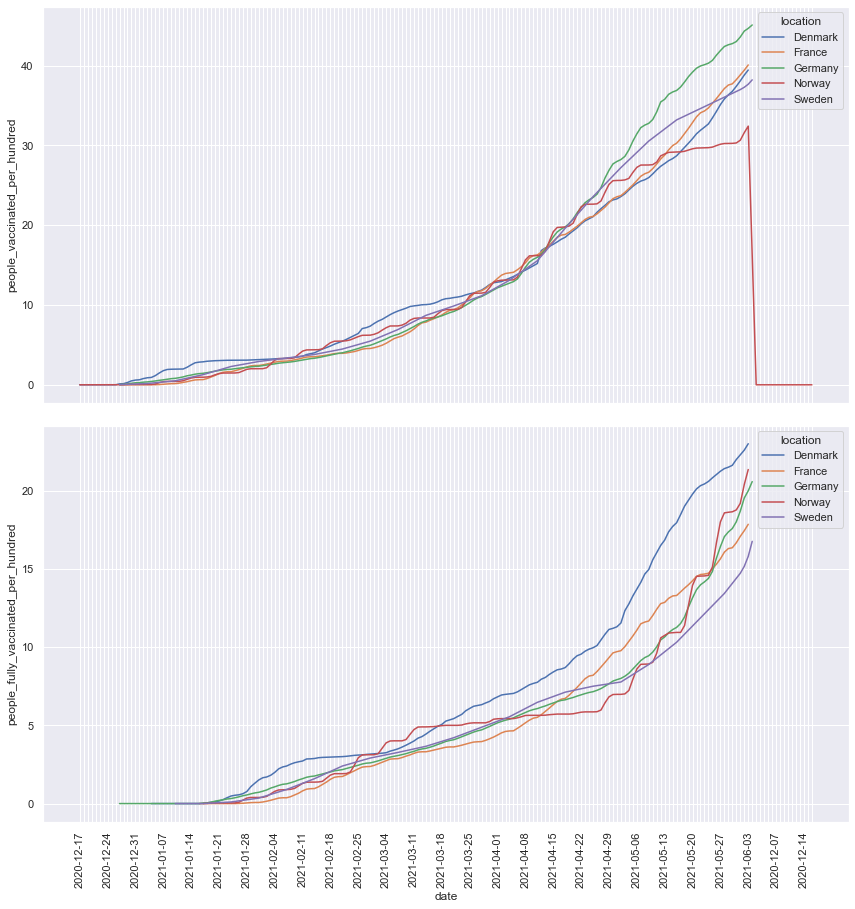

In [24]:
sns.set(rc={'figure.figsize':(12, 12)})
fig, ax = plt.subplots(2, 1, sharex=True)
fig.tight_layout()

plt.xticks(rotation=90)

g1 = sns.lineplot(data=df[df['location'].isin(country_list)], x="date", y="people_vaccinated_per_hundred", hue="location", ax=ax[0])

g2 = sns.lineplot(data=df[df['location'].isin(country_list)], x="date", y="people_fully_vaccinated_per_hundred", hue="location", ax=ax[1])

[l.set_visible(False) for (i,l) in enumerate(fig.gca().xaxis.get_ticklabels()) if i % 7 != 0];



# Vaccination rate based on both first and second dose -> percentage of doses to be set already being set

In [25]:
df['overall_percentage'] = (df['people_vaccinated_per_hundred'] + df['people_fully_vaccinated_per_hundred']) / 2

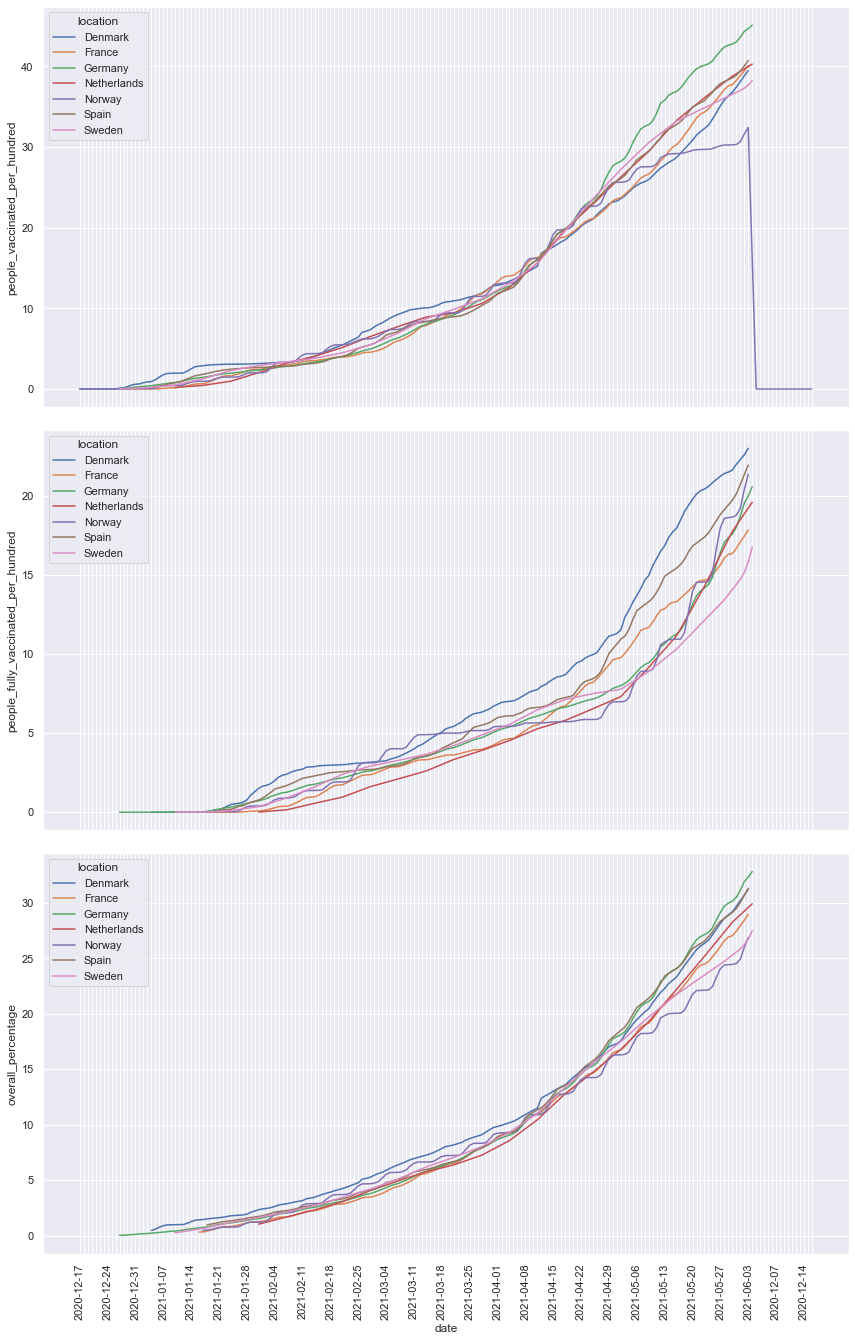

In [33]:
sns.set(rc={'figure.figsize':(12, 18)})
fig, ax = plt.subplots(3, 1, sharex=True)
fig.tight_layout()

plt.xticks(rotation=90)

g1 = sns.lineplot(data=df[df['location'].isin(country_list)], x="date", y="people_vaccinated_per_hundred", hue="location", ax=ax[0])

g2 = sns.lineplot(data=df[df['location'].isin(country_list)], x="date", y="people_fully_vaccinated_per_hundred", hue="location", ax=ax[1])

g3 = sns.lineplot(data=df[df['location'].isin(country_list)], x="date", y="overall_percentage", hue="location", ax=ax[2])

[l.set_visible(False) for (i,l) in enumerate(fig.gca().xaxis.get_ticklabels()) if i % 7 != 0];



## 14-days case rate per 100.000 inhabitants (from 2020)

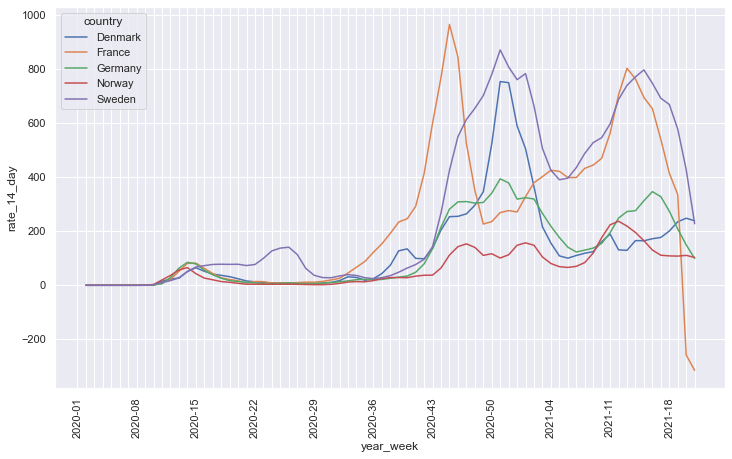

In [27]:
sns.set(rc={'figure.figsize':(12, 7)})
plt.xticks(rotation=90)

g = sns.lineplot(data=df_inf[df_inf['country'].isin(country_list)], x="year_week", y="rate_14_day", hue="country")

[l.set_visible(False) for (i,l) in enumerate(g.xaxis.get_ticklabels()) if i % 7 != 0];

## 14-days case rate per 100.000 inhabitants (from 2021)

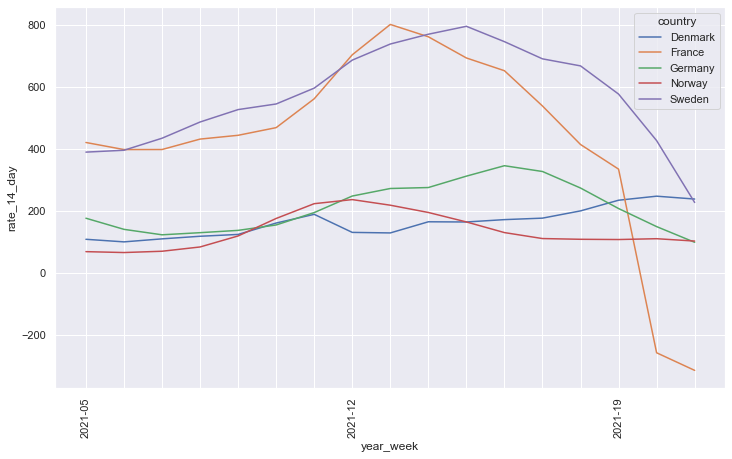

In [28]:
sns.set(rc={'figure.figsize':(12, 7)})
plt.xticks(rotation=90)

g = sns.lineplot(data=df_inf2[df_inf2['country'].isin(country_list)], x="year_week", y="rate_14_day", hue="country", ci=None)

[l.set_visible(False) for (i,l) in enumerate(g.xaxis.get_ticklabels()) if i % 7 != 0];

# Format of data

## Vaccination data

In [29]:
df[df['location']=='Germany']

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,overall_percentage
8050,Germany,DEU,2020-12-27,24101.0,24085.0,16.0,NaN,NaN,0.03,0.03,0.00,NaN,0.015
8051,Germany,DEU,2020-12-28,42658.0,42604.0,54.0,18557.0,18557.0,0.05,0.05,0.00,221.0,0.025
8052,Germany,DEU,2020-12-29,93510.0,92733.0,777.0,50852.0,34704.0,0.11,0.11,0.00,414.0,0.055
8053,Germany,DEU,2020-12-30,156539.0,155638.0,901.0,63029.0,44146.0,0.19,0.19,0.00,527.0,0.095
8054,Germany,DEU,2020-12-31,206739.0,205689.0,1050.0,50200.0,45660.0,0.25,0.25,0.00,545.0,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8205,Germany,DEU,2021-05-31,50649835.0,36042050.0,15087409.0,535494.0,708955.0,60.45,43.02,18.01,8462.0,30.515
8206,Germany,DEU,2021-06-01,51621711.0,36525042.0,15660124.0,971876.0,754945.0,61.61,43.59,18.69,9011.0,31.140
8207,Germany,DEU,2021-06-02,52837925.0,37142497.0,16360291.0,1216214.0,761822.0,63.06,44.33,19.53,9093.0,31.930
8208,Germany,DEU,2021-06-03,53460149.0,37424543.0,16751030.0,622224.0,703954.0,63.81,44.67,19.99,8402.0,32.330


## 14-day cases

In [30]:
df_inf[df_inf["country"]=="Germany"]

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
10594,Germany,DEU,Europe,83166711,cases,0,2020-01,NaN,0,"Epidemic intelligence, national weekly data"
10595,Germany,DEU,Europe,83166711,cases,0,2020-02,0.000000,0,"Epidemic intelligence, national weekly data"
10596,Germany,DEU,Europe,83166711,cases,0,2020-03,0.000000,0,"Epidemic intelligence, national weekly data"
10597,Germany,DEU,Europe,83166711,cases,0,2020-04,0.000000,0,"Epidemic intelligence, national weekly data"
10598,Germany,DEU,Europe,83166711,cases,9,2020-05,0.010822,9,"Epidemic intelligence, national weekly data"
...,...,...,...,...,...,...,...,...,...,...
10663,Germany,DEU,Europe,83166711,cases,126657,2021-17,327.394214,3425982,"Epidemic intelligence, national weekly data"
10664,Germany,DEU,Europe,83166711,cases,101269,2021-18,274.059173,3527251,"Epidemic intelligence, national weekly data"
10665,Germany,DEU,Europe,83166711,cases,71595,2021-19,207.852394,3598846,"Epidemic intelligence, national weekly data"
10666,Germany,DEU,Europe,83166711,cases,52794,2021-20,149.565852,3651640,"Epidemic intelligence, national weekly data"
